In [1]:
import pandas as pd
import numpy as np

# Sample Task Scores
Seven different simulations of possible task scores, each with 50 data points.

In [2]:
n = 50
random_task_scores = [np.random.random() for i in range(n)]

bad_task_scores = [np.random.random() * 0.3 for i in range(n)]
good_task_scores = [np.random.random() * 0.2 + 0.8 for i in range(n)]
improvement_task_scores = [0.2 + (i / (n * 2)) + (np.random.random() * 0.1) - 0.05 for i in range(n)]
degenerate_task_scores = [0.8 - (i / (n * 2)) + (np.random.random() * 0.1) - 0.05 for i in range(n)]
outlier_task_scores = [np.random.random() * 0.2 + 0.8 for i in range(n//2)] + [0.2] + [np.random.random() * 0.2 + 0.8 for i in range(n//2)]
variety_task_scores = [0.2 + (i / (n * 2)) + (np.random.random() * 0.4) - 0.2 for i in range(n // 3)] + \
                            [np.random.random() * 0.2 + 0.8 for i in range(n // 3)] + \
                            [0.2 + (np.random.random() * 0.1) for i in range(n // 3)]
#+ [0.3 for i in range(4)] (if we ever want to see how many bad scores it takes to tank the ucs)

# UCS Scoring Function
Takes in a desired user_id and the current ucs, parses a csv for that user, then returns the newly calculated ucs based.

UCS = old_ucs * (1 - c) + c * task_score

c = logistic(var_scores / (np.log(num_task_scores + 1) / (np.log(a))), 10, 0.2)

def logistic(x, k, offset):
    return 1 / (1 + np.e**(-k * (x - offset)))
    
k = 10 = logistic growth factor, offset = 0.2

num_task_scores = total number of tasks done

var_scores = variance(last n scores), n = min(10, sqrt(num_task_scores))

a = 1000

In [3]:
# new ucs function that reads accepts values read from a csv and a current user ucs score
def ucs(user_id, cur_ucs):
    def logistic(x, k, offset):
        return 1 / (1 + np.e**(-k * (x - offset)))
    # each row of the csv corresponds to one user, with the first value being the user_id and the rest being task scores
    def task_scores_from_csv(user_id):
        #      0   1   2   3
        # id1  11  12  13  14
        # id2  21  22  23  24
        # id3  31  32  33  34
        df = pd.read_csv('task_scores.csv', header=None, index_col=0)
        task_scores = df.loc[[user_id]].to_numpy()[0]
        return task_scores
    task_scores = task_scores_from_csv(user_id)
    a = 1000
    num_task_scores = len(task_scores)
    n = min(10, int(np.sqrt(num_task_scores)) + 1)
    if num_task_scores == 0:
        return 0.5
    else:
        var_scores = np.var(task_scores[-n:])
        c = logistic(var_scores / (np.log(num_task_scores + 1) / (np.log(a))), 10, 0.2)
        new_ucs = cur_ucs * (1 - c) + (c) * task_scores[-1] #task_scores[-1] = latest task score

    return new_ucs

# Old UCS Graphing Function
Takes in a list of task scores, a function to compute n (the number of past scores to consider) and the log base a.

Iteratively computes and saves ucs scores and c values as lists for each data point input and returns those two lists.

In [41]:
# old function for generating graphs of ucs and c-values
def ucs_test(task_scores, n_func, a):
    def logistic(x, k, offset):
        return 1 / (1 + np.e**(-k * (x - offset)))
    ucs = 0.5
    example_ucs_scores = [ucs]
    c_values = [0.5]
    for i in range(len(task_scores)):
        n = n_func(i)
        var_scores = np.var(task_scores[max(0, i - n + 1):i + 1])
        c = logistic(var_scores / (np.log(i + 2) / (np.log(a))), 10, 0.2) #have completed i + 1 tasks at this point
        c_values.append(c)
        ucs = ucs * (1 - c) + (c) * task_scores[i] #task_scores[i] = latest task score
        example_ucs_scores.append(ucs)

    return example_ucs_scores, c_values

# Graphing Driver Function
Takes in a list of task_scores. Generates three graphs using ucs_test() for three ways of considering past scores: 1) last n 2) last 25% 3) last sqrt(n)

In [39]:
def graph_ucs(task_scores):
    a = 1000
    ucs_n, c_values_n = ucs_test(task_scores, lambda x: 10, a)
    ucs_proportional, c_values_proportional = ucs_test(task_scores, lambda n: int(.25 * n) + 1, a)
    ucs_scores_sqrt, c_values_sqrt = ucs_test(task_scores, lambda n: int(np.sqrt(n)) + 1, a)
#     last n
    task_scores = [0] + task_scores
    df = pd.DataFrame({'task scores': task_scores, 'ucs': ucs_n, 'c': c_values_n}, index=range(len(c_values_n)))
    df.plot(title="Last n")
#     last 25%
    df = pd.DataFrame({'task scores': task_scores, 'ucs': ucs_proportional, 'c': c_values_proportional}, index=range(len(c_values_proportional)))
    df.plot(title="last 25%")
#     last sqrt(n)
    df = pd.DataFrame({'task scores': task_scores, 'ucs': ucs_scores_sqrt, 'c': c_values_sqrt}, index=range(len(c_values_sqrt)))
    df.plot(title="Last sqrt(n)")

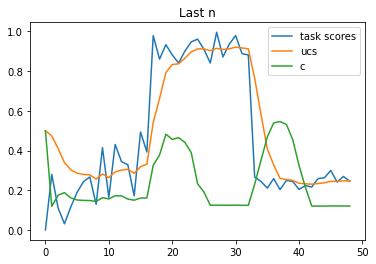

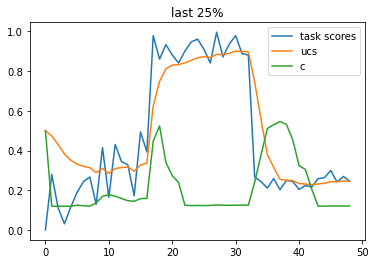

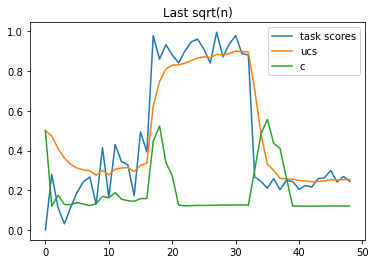

In [42]:
graph_ucs(variety_task_scores)

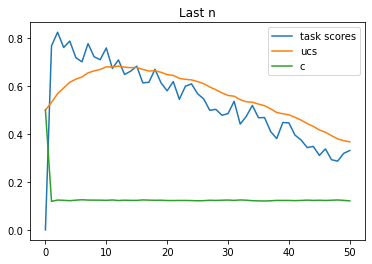

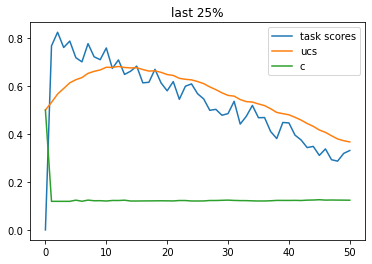

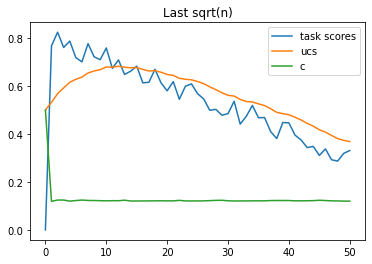

In [33]:
graph_ucs(degenerate_task_scores)

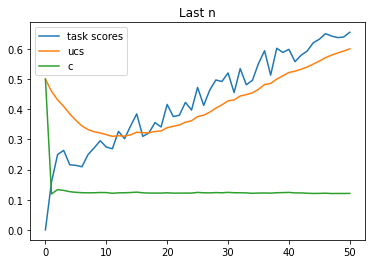

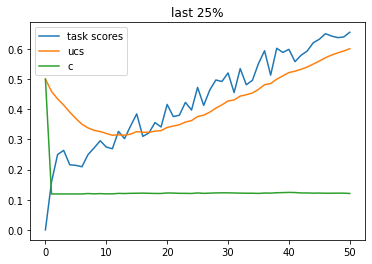

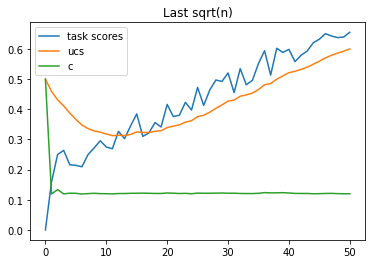

In [34]:
graph_ucs(improvement_task_scores)

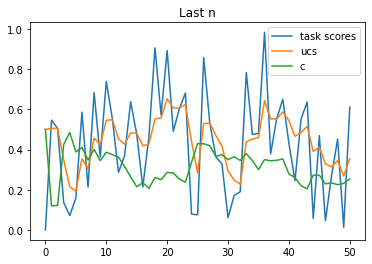

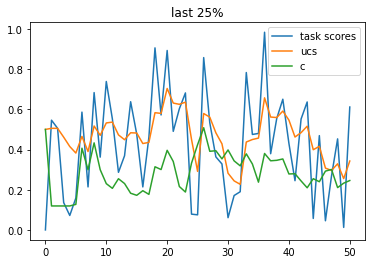

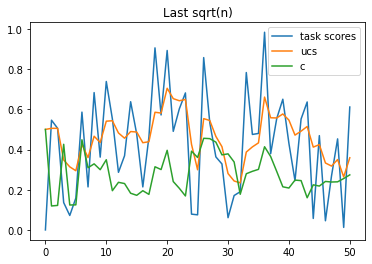

In [35]:
graph_ucs(random_task_scores)

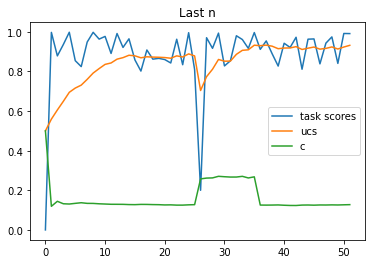

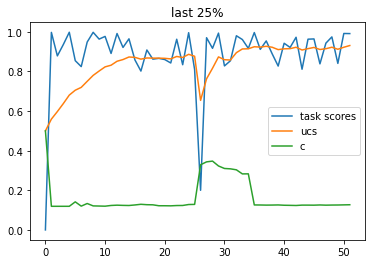

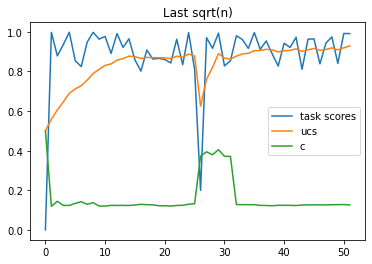

In [36]:
graph_ucs(outlier_task_scores)

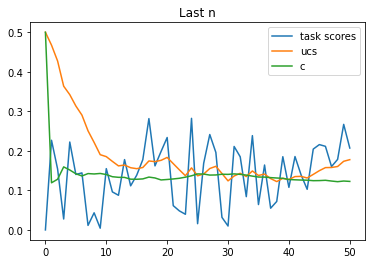

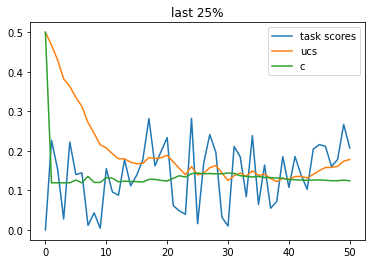

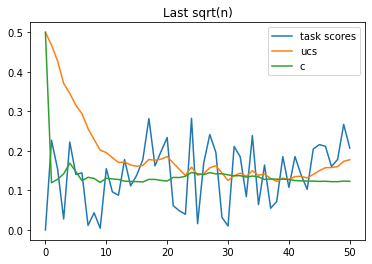

In [37]:
graph_ucs(bad_task_scores)